In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with np.load("../assets/weather_data.npz") as weather:
    temperature = weather["temperature"]

In [3]:
temperature.ndim

3

In [4]:
temperature.shape

(8, 75, 75)

The ground-level slice is at index `0`:

In [5]:
np.mean(temperature[0])

280.29968572319876

This number is so high due to it being in Kelvin. Convert it to Celcius with:

In [6]:
temperature -= 273.15

In [7]:
np.mean(temperature[0])

7.149685723198808

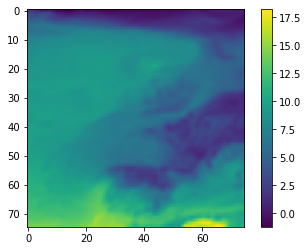

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(temperature[0])

fig.colorbar(im)

We can get a vertical profile of temperatures by selecting all values from the first dimension (i.e., altitude) and any latitude/longitude combination we want from the second and third dimension 

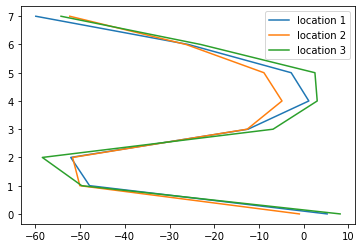

In [32]:
vertical_temperature_profile_1 = temperature[:,60,40]
vertical_temperature_profile_2 = temperature[:,0,10]
vertical_temperature_profile_3 = temperature[:,10,30]

fig, ax = plt.subplots()

# we can simply merge multiple graphs into the "ax" plot
ax.plot(vertical_temperature_profile_1, np.arange(8), label = "location 1")
ax.plot(vertical_temperature_profile_2, np.arange(8), label = "location 2")
ax.plot(vertical_temperature_profile_3, np.arange(8), label = "location 3")

plt.legend()

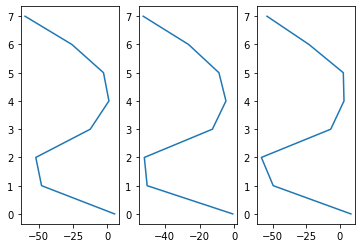

In [37]:
# we create three individual axes and combine them horizontally (i.e, one row and three columns)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

# plot each profile into its own subplot
ax1.plot(vertical_temperature_profile_1, np.arange(8))
ax2.plot(vertical_temperature_profile_2, np.arange(8))
ax3.plot(vertical_temperature_profile_3, np.arange(8))


Averaging over the vertical coordinate (i.e., including all the data from the higher atmosphere) both smooths out the data, as well as brings its average down:

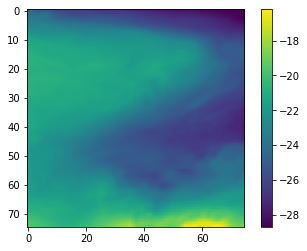

In [9]:
average_column = np.mean(temperature, axis=0)

fig, ax = plt.subplots()
im = ax.imshow(average_column)

fig.colorbar(im)

[Text(0.5, 0, 'Latitude index [increases southwards]'),
 Text(0, 0.5, 'Zonal mean surface temperatures [°C]')]

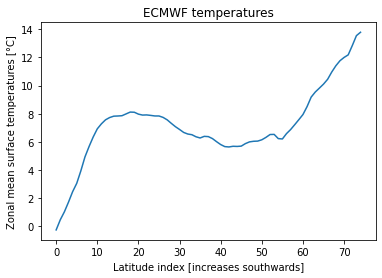

In [10]:
# Higher values of the index are more South
average_by_latitude = np.mean(temperature[0], axis=1)

fig, ax = plt.subplots()
im = ax.plot(average_by_latitude)

ax.title.set_text('ECMWF temperatures')
ax.set(xlabel='Latitude index [increases southwards]', ylabel='Zonal mean surface temperatures [°C]')

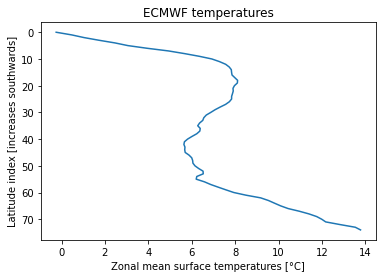

In [11]:
# it might also be a good idea to change the x and y-axis
average_by_latitude = np.mean(temperature[0], axis=1)

fig, ax = plt.subplots()

# latitudes on y-axis
im = ax.plot(average_by_latitude, np.arange(75))

ax.title.set_text('ECMWF temperatures')
ax.set(xlabel='Zonal mean surface temperatures [°C]', ylabel='Latitude index [increases southwards]')

# OPTIONAL: set top of y-axis to represent northernmost point 
ax.invert_yaxis()